# PROJECT TITLE: OLA RIDES INSIGHTS

## AIM: Analyze OLA’s ride-sharing data to uncover patterns, optimize operations, and enhance customer satisfaction by leveraging data analytics, visualizations, and interactive applications.

### IMPORT LIBRARY AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('ola.csv')
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [7]:
df.describe()

,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Unnamed: 20
count,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000,0.0
mean,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313,NaN
std,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957,NaN
min,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000,NaN
25%,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000,NaN
50%,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000,NaN
75%,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000,NaN
max,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000,NaN


In [9]:
df.isnull().sum()

Date                               0
Time                               0
Booking_ID                         0
Booking_Status                     0
Customer_ID                        0
Vehicle_Type                       0
Pickup_Location                    0
Drop_Location                      0
V_TAT                          39057
C_TAT                          39057
Canceled_Rides_by_Customer     92525
Canceled_Rides_by_Driver       84590
Incomplete_Rides               39057
Incomplete_Rides_Reason        99098
Booking_Value                      0
Payment_Method                 39057
Ride_Distance                      0
Driver_Ratings                 39057
Customer_Rating                39057
Vehicle Images                     0
Unnamed: 20                   103024
dtype: int64

### DATA CLEANING

In [7]:
df.drop(columns='Unnamed: 20',inplace=True)

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['date']=df['Date'].dt.date

In [11]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,date
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...,2024-07-26
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-25
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-30
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-22
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-02


In [13]:
df.drop(columns='Date',inplace=True)

In [15]:
df.head()

,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,date
0,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...,2024-07-26
1,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-25
2,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-30
3,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-22
4,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-02


In [17]:
df['Payment_Method'] = df['Payment_Method'].fillna('no payment')
df['Canceled_Rides_by_Customer'] = df['Canceled_Rides_by_Customer'].fillna('no complain')
df['Canceled_Rides_by_Driver'] = df['Canceled_Rides_by_Driver'].fillna('no complain')
df['Incomplete_Rides'] = df['Incomplete_Rides'].fillna('unknown')
df['Incomplete_Rides_Reason'] = df['Incomplete_Rides_Reason'].fillna('unknown')

In [19]:
df.head()

,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,date
0,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,no complain,Personal & Car related issue,unknown,unknown,444,no payment,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...,2024-07-26
1,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,no complain,no complain,No,unknown,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-25
2,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,no complain,no complain,No,unknown,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...,2024-07-30
3,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,no complain,unknown,unknown,384,no payment,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...,2024-07-22
4,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,no complain,no complain,No,unknown,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...,2024-07-02


In [21]:
df.isnull().sum()

Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer        0
Canceled_Rides_by_Driver          0
Incomplete_Rides                  0
Incomplete_Rides_Reason           0
Booking_Value                     0
Payment_Method                    0
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
date                              0
dtype: int64

### DATA VISUALIZATION

#### CHART 1: Booking Status Breakdown 

In [30]:
status=df['Booking_Status'].value_counts()

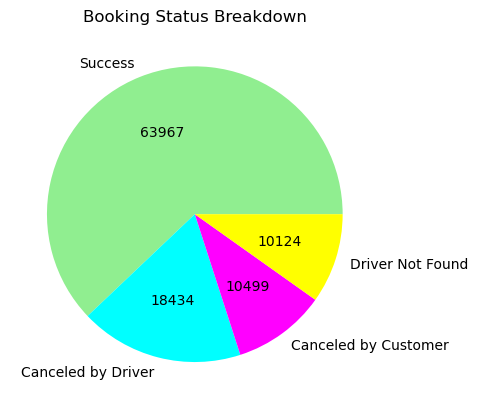

In [99]:
colors = ['#90ee90', 'cyan', 'magenta', 'yellow']
plt.pie(status.values,labels=status.index,autopct=lambda x:int(round(x * sum(status) / 100)),colors=colors)
plt.title('Booking Status Breakdown')
plt.show()

#### CHART 2: Top 5 Vehicle Types by Ride Distance 

In [100]:
vehicle=df.groupby('Vehicle_Type')['Ride_Distance'].sum().sort_values(ascending=False).head(5).reset_index()

In [102]:
vehicle

,Vehicle_Type,Ride_Distance
0,Prime Sedan,234535
1,eBike,230842
2,Bike,227746
3,Prime Plus,227186
4,Mini,225703


Text(0, 0.5, 'Vehicle Type')

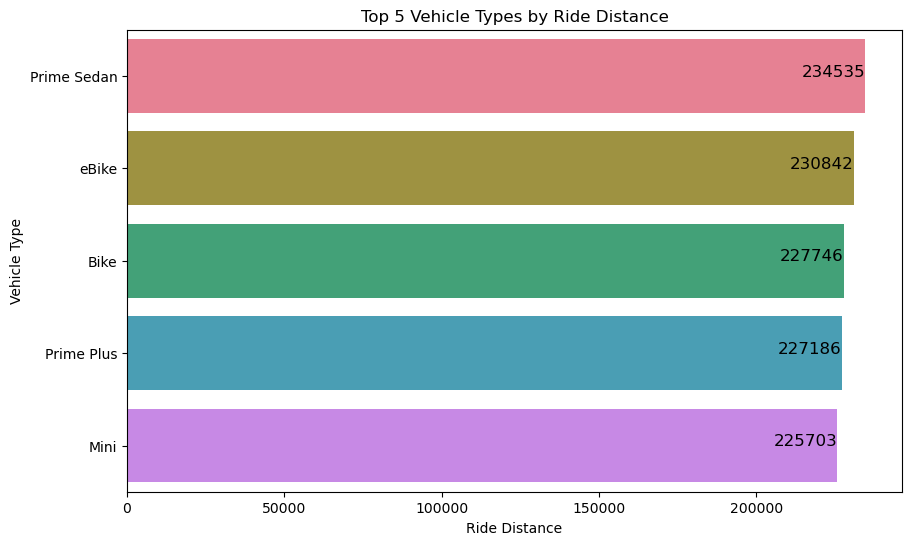

In [125]:
plt.figure(figsize=(10,6))
plot=sns.barplot(data=vehicle,x='Ride_Distance',y='Vehicle_Type',hue='Vehicle_Type',palette='husl')
for label in plot.patches:
    width=label.get_width()
    plt.text(width,label.get_y()+label.get_height()/2,int(width),ha='right',fontsize=12)
plt.title('Top 5 Vehicle Types by Ride Distance')
plt.xlabel('Ride Distance')
plt.ylabel('Vehicle Type')

#### CHART 3: Revenue by Payment Method

In [36]:
revenue=df.groupby('Payment_Method')['Booking_Value'].sum().head(4).reset_index()

In [38]:
revenue

,Payment_Method,Booking_Value
0,Cash,19260316
1,Credit Card,1312793
2,Debit Card,338922
3,UPI,14168436


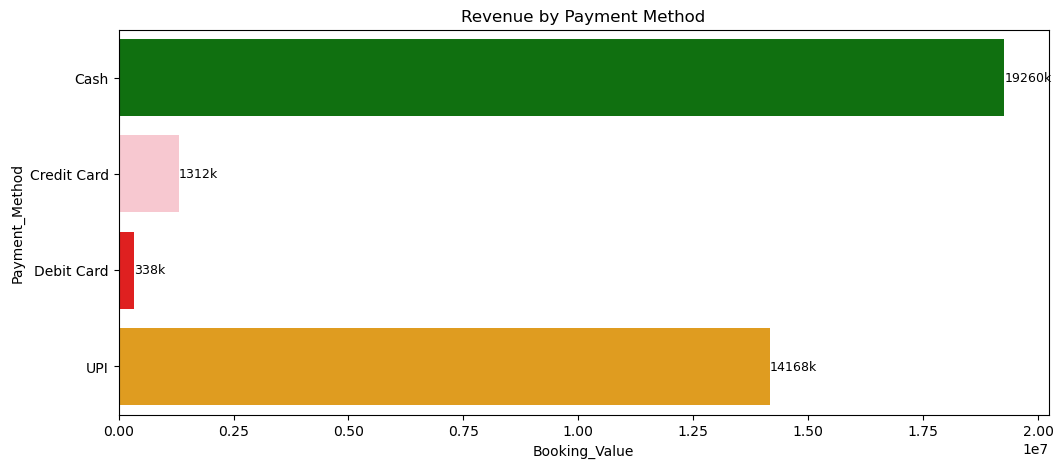

In [96]:
plt.figure(figsize=(12,5))
colors = ['green', 'pink', 'red', 'orange']
plot=sns.barplot(data=revenue,x='Booking_Value',y='Payment_Method',hue='Payment_Method',palette=colors)
for i in plot.patches:
    width=i.get_width()
    width_k=int(width/1000)
    plt.text(width,i.get_y()+i.get_height()/2,f'{width_k}k',ha='left',va='center',fontsize=9)
plt.title('Revenue by Payment Method')
plt.xlabel('Booking_Value')
plt.ylabel('Payment_Method')
plt.show()

#### CHART 4: Ride Distance Distribution Per Day

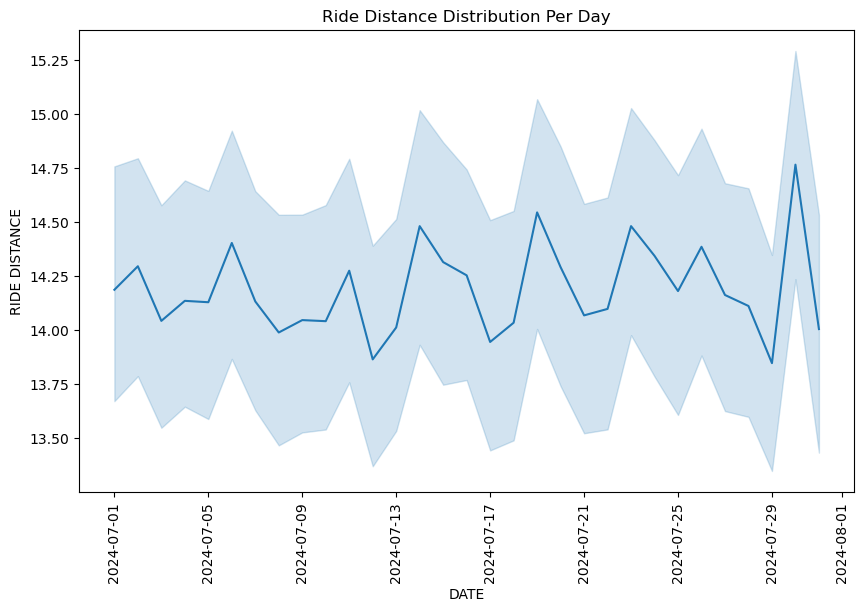

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='date',y='Ride_Distance')
plt.title('Ride Distance Distribution Per Day')
plt.xticks(rotation=90)
plt.xlabel('DATE')
plt.ylabel('RIDE DISTANCE')
plt.show()

#### CHART 5: Customer Rating VS Driver Rating

Text(0.5, 1.0, 'Customer Rating VS Driver Rating')

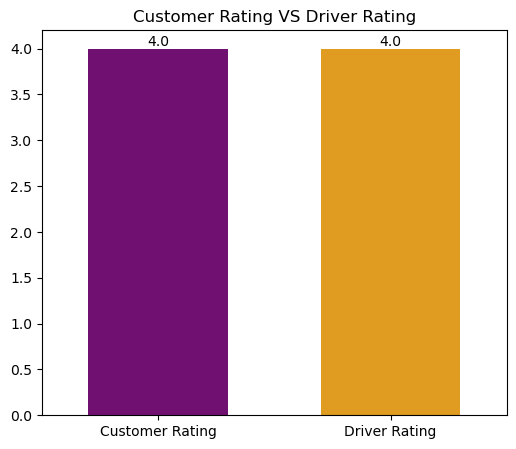

In [100]:
customer= df['Customer_Rating'].mean().round(2)
driver= df['Driver_Ratings'].mean().round(2)

categories = ['Customer Rating', 'Driver Rating']
averages = [customer,driver]

plt.figure(figsize=(6,5))
plot = sns.barplot(x=categories, y=averages,hue=categories,palette=['purple','orange'],width=0.6)
for i in plot.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,float(height),ha='center',va='bottom')
plt.title('Customer Rating VS Driver Rating')

#### CHART 6: Correlation BW Ride_Distance, Booking_Value, Driver_Ratings, Customer_Rating

In [107]:
correlation=df[['Ride_Distance','Driver_Ratings','Customer_Rating','Booking_Value']].corr()

<Axes: >

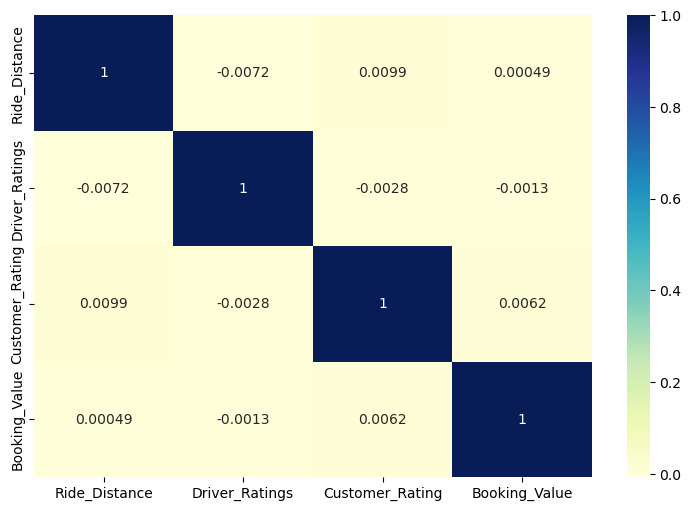

In [113]:
plt.figure(figsize=(9,6))
sns.heatmap(correlation,annot=True,cmap='YlGnBu')

#### CHART 7: Comparing Customer_Rating for each Vehicle_Type.

In [131]:
compare=df.groupby('Vehicle_Type')['Customer_Rating'].mean().round(3).reset_index()

In [133]:
compare

,Vehicle_Type,Customer_Rating
0,Auto,3.999
1,Bike,3.993
2,Mini,3.998
3,Prime Plus,4.009
4,Prime SUV,3.999
5,Prime Sedan,4.002
6,eBike,3.988


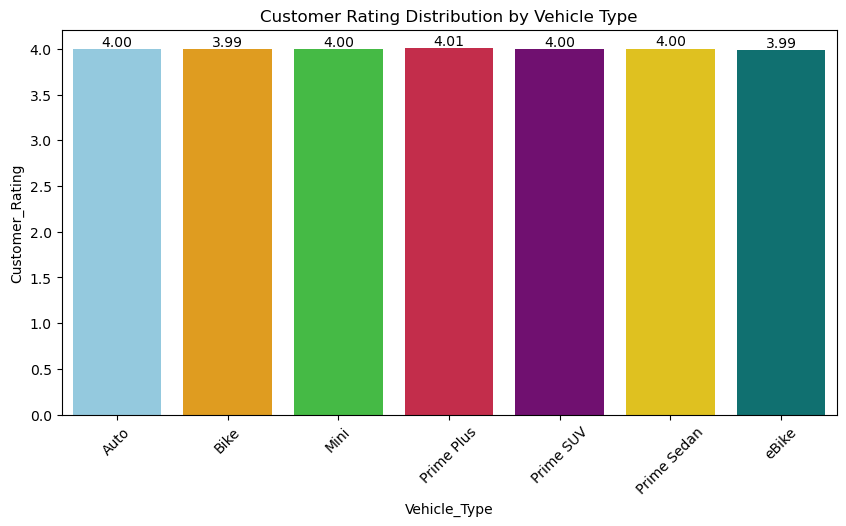

In [153]:
plt.figure(figsize=(10,5))
colors = ['skyblue', 'orange', 'limegreen', 'crimson', 'purple', 'gold', 'teal']
plot=sns.barplot(data=compare, x='Vehicle_Type', y='Customer_Rating',hue='Vehicle_Type',palette=colors)
for i in plot.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f'{height:.2f}',ha='center',va='bottom')
plt.title('Customer Rating Distribution by Vehicle Type')
plt.xlabel('Vehicle_Type')
plt.ylabel('Customer_Rating')
plt.xticks(rotation=45)
plt.show()

#### CHART 8: Top 5 pickup location by total booking value

In [40]:
location=df.groupby('Pickup_Location')['Booking_Value'].sum().sort_values(ascending=False).head(5)

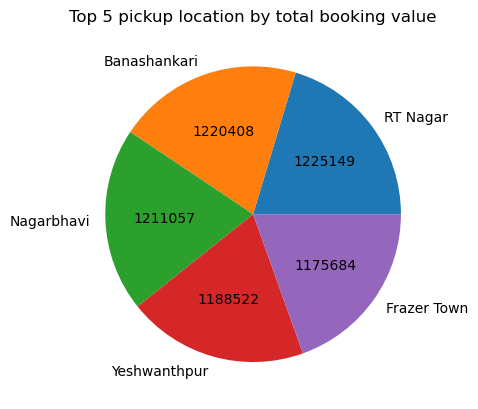

In [50]:
plt.pie(location.values,labels=location.index,autopct=lambda x:int(x*sum(location)/100))
plt.title('Top 5 pickup location by total booking value')
plt.show()